In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns=999
pd.options.display.max_rows=999
import sklearn.datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#import graphviz
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix


# %%
## IMPORT PYTHON LIBRARIES ##
import time
import glob
import dill
import joblib
import warnings
import pandas as pd
import numpy as np
import xgboost as xgb
from lightgbm import LGBMClassifier
import lightgbm
import lime.lime_tabular
from datetime import date
from sklearn import tree
from sklearn import metrics
from collections import defaultdict
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

import bayes_opt
from bayes_opt import BayesianOptimization

import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from matplotlib.patches import Patch

## KONFIGURASI PANDAS DAN PLOT ##
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.option_context("display.max_rows", 100)
rcParams['figure.figsize'] = 12, 4

#######################PLOTTING FUNCTION#######################

# set the style of the axes and the text color
plt.rcParams['figure.figsize'] = (12.0, 5.0)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
sns.set_palette("bright")


# 1.Import Dataset

In [142]:
data_train = pd.read_csv('20210724_data_train_HR_analytics_Codex.csv')
data_test = pd.read_csv('20210724_data_test_HR_analytics_Codex.csv')

#data_mei = data_train.append(data_test)

In [143]:
data_train.EmploymentStatus.value_counts()

1    139
0     61
Name: EmploymentStatus, dtype: int64

In [144]:
data_test.EmploymentStatus.value_counts()

1    55
0    32
Name: EmploymentStatus, dtype: int64

# 2. Define Predictors & Target Feature for Modelling

In [72]:
data_train.head()

'TermReason_more money',
 'TermReason_career change',
 'RecruitmentSource_Google Search',
 'TermReason_attendance',
 'TermReason_hours',
 'TermReason_return to school',
'TermReason_relocation out of area',
 'TermReason_performance',
'TermReason_retiring',
'TermReason_medical issues',
 'TermReason_no-call, no-show',
 'TermReason_maternity leave - did not return',
'TermReason_Another position',
'TermReason_unhappy'

,Employee_Name,DateofTermination,EmploymentStatus,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,MarriedID_Married,MarriedID_Not married,MaritalStatusID_Divorced,MaritalStatusID_Married,MaritalStatusID_Single,MaritalStatusID_Widowed,GenderID_F,GenderID_M,EmpStatusID_Karyawan Organik,EmpStatusID_Prohire,EmpStatusID_TKP/ Outsource,RoleID_Artificial Intelligent,RoleID_Back End Developer,RoleID_Business Analyst,RoleID_DevOps Engineer,RoleID_Digital Product Manager,RoleID_Front End Developer,RoleID_Mobile Developer Android,RoleID_Mobile Developer iOS,RoleID_Product Owner,RoleID_Scrum Master,RoleID_Software Architect,RoleID_System Documentation,RoleID_UI Designer,RoleID_UX Designer,RoleID_UX Researcher,RoleID_UX Writer,LevelID_Junior,LevelID_Middle,LevelID_Senior,PerfScoreID_Average,PerfScoreID_Exceed,PerfScoreID_Fully meets,PerfScoreID_Need improvement,PerfScoreID_Special treatment,Tribe_COM,Tribe_Com,Tribe_EDU,Tribe_ENT,Tribe_EWD,Tribe_FIN,Tribe_HLT,Tribe_IHL,Tribe_IHX,Tribe_LGT,Tribe_VGA,Squad_AM Performance,Squad_Activate & Install,Squad_Active & Install,Squad_Ads Based,Squad_Arkademy,Squad_Bonum,Squad_ChatAja,Squad_Core Domain,Squad_DTP Com,Squad_Data & Dashboard Analytics,Squad_Delivery & Project Mgt,Squad_Evaluate,Squad_Explore,Squad_GTM,Squad_Get Support,Squad_Get Support\r,Squad_Get Support & Terminated,Squad_HunianAja,Squad_IndiBOX Apps,Squad_IndiBOX STB,Squad_IndiHome Music,Squad_IndiHome Smart,Squad_IndiHome Study,Squad_Inpoin,Squad_Intermoda,Squad_Lead/Reviewer/Maintener,Squad_Logee Port,Squad_Logee Port (Maintainer),Squad_Logee Truck All Product,Squad_Logee Truck Apps,Squad_Logee Truck Web,Squad_MPS,Squad_MyPertamina,Squad_NETMONK,Squad_OCA,Squad_Pay,Squad_Payment - SSOF,Squad_PeduliLindungi,Squad_Platform,Squad_Pre Vaksinasi,Squad_Product & Content Management System,Squad_Progressive Web App,Squad_RPA & Profitability,Squad_Refactoring New IA,Squad_Sales Cycle,Squad_Sales Cycle,Squad_Sales Cycle,Squad_Squad A,Squad_Squad B,Squad_Squad C,Squad_Squad Control Tower,Squad_Squad D,Squad_Squad Pijar Corpu,Squad_Squad Pijar Mahir,Squad_Squad Pijar Sekolah,Squad_Squad Service Core,Squad_UMEETME,Squad_UseeTV Go,Squad_Vaksinasi,Squad_Vutura,RaceDesc_Bali,RaceDesc_Cina,RaceDesc_Jawa,RaceDesc_Padang,RaceDesc_Sunda,TermReason_Another position,TermReason_Fatal attraction,TermReason_Learned that he is a gangster,TermReason_N/A-StillEmployed,TermReason_attendance,TermReason_career change,TermReason_hours,TermReason_maternity leave - did not return,TermReason_medical issues,TermReason_military,TermReason_more money,"TermReason_no-call, no-show",TermReason_performance,TermReason_relocation out of area,TermReason_retiring,TermReason_return to school,TermReason_unhappy,RecruitmentSource_CareerBuilder,RecruitmentSource_Diversity Job Fair,RecruitmentSource_Employee Referral,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Website,empSatisfaction_to_Absences,age_when_hire_day,hire_to_review_day,working_time,Absence_to_hire_to_review
0,Irham Raziqony,2021-07-24,1,4.50,3,0,0,6,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.500000,8429,1715,2241,0.003499
1,Herdis Suryatna,2016-10-31,0,4.50,5,0,0,20,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.250000,15732,696,1699,0.028736
2,Chika Mareyza Anjani,2021-07-24,1,4.70,3,6,0,2,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [145]:
predictors =[
 'empSatisfaction_to_Absences',
 'SpecialProjectsCount',
 'DaysLateLast30',
 'Absences',
 'age_when_hire_day',
 'EngagementSurvey',
 'RecruitmentSource_Website',
 'Squad_RPA & Profitability',
 'EmpSatisfaction',
 'RecruitmentSource_LinkedIn',
 'RoleID_Scrum Master',
 'RecruitmentSource_Diversity Job Fair',
 'Tribe_FIN',
 'Tribe_EDU',
 'Squad_Inpoin',
 'RecruitmentSource_Employee Referral',
 'RecruitmentSource_Indeed',
 'Tribe_HLT',
 'EmpStatusID_Karyawan Organik',
 'Squad_HunianAja',
 'Squad_Pay',
 'Squad_PeduliLindungi',
 'Squad_IndiBOX Apps',
 'Squad_ChatAja',
 'Squad_Squad Service Core',
 'Squad_MyPertamina',
 'RoleID_Mobile Developer Android',
 'RecruitmentSource_CareerBuilder',
 'RoleID_Business Analyst',
 'Tribe_ENT',
 'Squad_Logee Truck All Product',
 'Squad_Get Support',
 'Tribe_IHL',
 'Squad_Squad Pijar Sekolah',
 'Squad_IndiHome Smart',
 'Squad_Intermoda',
 'TermReason_military',
 'hire_to_review_day',
'Absence_to_hire_to_review'
]

target_label = 'EmploymentStatus'



In [146]:
def thr(data_test_predprob,data_test,label,csv_name):
    pd_matrix = pd.DataFrame(columns=['threshold', 'tp', 'fp', 'tn', 'fn', 'accuracy','precision', 'recall', 'fpr'], dtype=object)
    for threshold in range(1, 1000, 1):
        threshold = float(threshold) / 1000
        label_predict = (data_test_predprob >= threshold).astype(int)

        tn, fp, fn, tp = metrics.confusion_matrix(data_test[label], label_predict).ravel()

        pd_matrix = pd_matrix.append(pd.Series([threshold, tp, fp, tn, fn, round((tp + tn) / (tp + tn + fp + fn), 4),         round(tp / (tp + fp), 4), round(tp / (tp + fn), 4), round(fp / (tn + fp), 4)],             index=['threshold', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'fpr']), ignore_index=True)
    
    return pd_matrix.to_csv(csv_name, index=False)

# Logistic Regression

In [147]:
# Normalizing continuous variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(data_train[predictors])
X_train = scaler.transform(data_train[predictors])
X_test = scaler.transform(data_test[predictors])

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, data_train[target_label].values)

LogisticRegression(solver='liblinear')

Feature: 0, Score: -0.09556
Feature: 1, Score: 1.29616
Feature: 2, Score: -0.64378
Feature: 3, Score: -0.26947
Feature: 4, Score: -0.05005
Feature: 5, Score: 0.01618
Feature: 6, Score: 1.07335
Feature: 7, Score: -0.90836
Feature: 8, Score: 0.07824
Feature: 9, Score: 1.13895
Feature: 10, Score: -1.04815
Feature: 11, Score: -0.32292
Feature: 12, Score: 0.39678
Feature: 13, Score: -0.34066
Feature: 14, Score: 0.45821
Feature: 15, Score: 0.63812
Feature: 16, Score: 0.78282
Feature: 17, Score: 0.61504
Feature: 18, Score: -0.24088
Feature: 19, Score: -0.48791
Feature: 20, Score: -0.04544
Feature: 21, Score: 0.54693
Feature: 22, Score: 0.81532
Feature: 23, Score: 0.18919
Feature: 24, Score: -0.07693
Feature: 25, Score: -0.37989
Feature: 26, Score: 0.40065
Feature: 27, Score: -0.03841
Feature: 28, Score: 0.51104
Feature: 29, Score: -0.43832
Feature: 30, Score: -0.35569
Feature: 31, Score: -0.28698
Feature: 32, Score: 0.40225
Feature: 33, Score: -1.02830
Feature: 34, Score: 0.38289
Feature: 35,

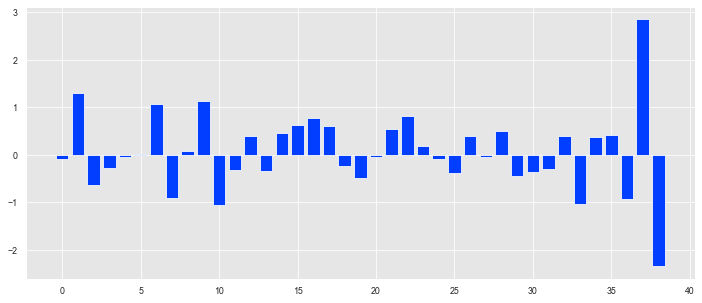

In [206]:
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [208]:
print(predictors[1])
print(predictors[2])
print(predictors[6])
print(predictors[7])

print(predictors[9])
print(predictors[10])
print(predictors[37])
print(predictors[38])

SpecialProjectsCount
DaysLateLast30
RecruitmentSource_Website
Squad_RPA & Profitability
RecruitmentSource_LinkedIn
RoleID_Scrum Master
hire_to_review_day
Absence_to_hire_to_review


In [201]:
importance

array([-0.09556378,  1.29615916, -0.64378451, -0.26947316, -0.05004756,
        0.01618388,  1.07334878, -0.90835547,  0.0782383 ,  1.13895443,
       -1.04814744, -0.32292246,  0.39677517, -0.34066109,  0.45820877,
        0.63811935,  0.78281561,  0.61503538, -0.24087977, -0.48790949,
       -0.04544471,  0.54692865,  0.81531825,  0.1891893 , -0.07693278,
       -0.37988608,  0.4006459 , -0.03840557,  0.51104357, -0.43832118,
       -0.35568668, -0.28697655,  0.40224759, -1.02829634,  0.3828894 ,
        0.41340332, -0.93663102,  2.86050359, -2.34282948])

In [197]:
#model_path = "%s_model_ceria_model1_LogisticReg.pkl" % str(date.today().strftime("%Y%m%d"))
#model = logreg.fit(X_train, data_train[target_label].values)
#joblib.dump(model, model_path)

['20210724_model_ceria_model1_LogisticReg.pkl']

In [149]:
y_pred = logreg.predict_proba(X_test)[:,1]
#y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, data_test[target_label].values)))
y_pred.shape
data_test[target_label].values.shape

Accuracy of logistic regression classifier on test set: 0.75


(87,)

In [35]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(data_test[target_label].values, y_pred)
#print(confusion_matrix)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(data_test[target_label].values, y_pred))
y_test = data_test[target_label]

              precision    recall  f1-score   support

           0       1.00      0.62      0.77        32
           1       0.82      1.00      0.90        55

    accuracy                           0.86        87
   macro avg       0.91      0.81      0.84        87
weighted avg       0.89      0.86      0.85        87



In [27]:
data_test.EmploymentStatus.value_counts()

1    55
0    32
Name: EmploymentStatus, dtype: int64

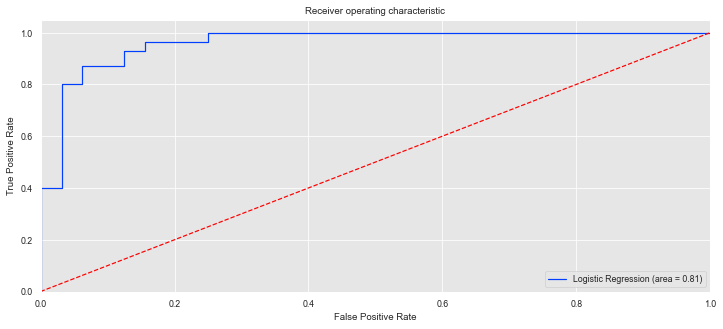

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(data_test[target_label].values, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(data_test[target_label].values, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [150]:
pd_result_log = pd.DataFrame(
    {'y_test': y_test,
     'y_pred': y_pred,
    })
pd_result_log

,y_test,y_pred
0,0,0.599695
1,0,0.248804
2,0,0.547772
3,1,0.796016
4,0,0.640788
5,0,0.717817
6,1,0.925394
7,0,0.755447
8,0,0.756075
9,0,0.101725


# XGBoost Implementation

In [151]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y_train = data_train[target_label].values
y_test = data_test[target_label].values

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

print(model)

[09:41:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:41:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator

In [152]:
# make predictions for test data
y_pred = model.predict_proba(X_test)[:,1]
#model.predict_proba(data_test[predictors])[:,1]
#predictions = [round(value) for value in y_pred]
y_pred

# evaluate predictions
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

array([0.99440175, 0.5089409 , 0.15529433, 0.9080998 , 0.7147992 ,
       0.75925505, 0.9577031 , 0.9784389 , 0.03103821, 0.02004424,
       0.9984572 , 0.9651378 , 0.14379807, 0.8751339 , 0.99682236,
       0.99196273, 0.9981775 , 0.9727684 , 0.94929504, 0.8004154 ,
       0.40639704, 0.96359456, 0.96563196, 0.87482613, 0.9528385 ,
       0.88213325, 0.9945766 , 0.95382106, 0.9814842 , 0.00113158,
       0.37312472, 0.00224864, 0.96064955, 0.9842868 , 0.9970943 ,
       0.03986732, 0.85444874, 0.9978605 , 0.00896445, 0.9258676 ,
       0.8333271 , 0.8975885 , 0.98580444, 0.9987104 , 0.997617  ,
       0.9992248 , 0.8311211 , 0.998309  , 0.99968684, 0.9917452 ,
       0.96005046, 0.99684024, 0.9988967 , 0.97566754, 0.99889565,
       0.03941714, 0.00236806, 0.9879296 , 0.88601667, 0.9989625 ,
       0.9950335 , 0.04846355, 0.9944028 , 0.9916459 , 0.977944  ,
       0.08578297, 0.18125005, 0.83040965, 0.99787855, 0.99573505,
       0.9059974 , 0.99307394, 0.17697601, 0.0047333 , 0.90146

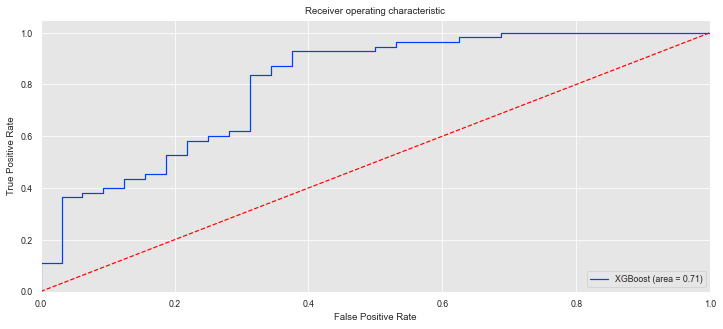

In [86]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
xgboost_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgboost_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [272]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.50      0.63        32
           1       0.76      0.95      0.85        55

    accuracy                           0.78        87
   macro avg       0.80      0.72      0.74        87
weighted avg       0.79      0.78      0.77        87



In [153]:
pd_result = pd.DataFrame(
    {'y_test': y_test,
     'y_pred': y_pred,
    })

# Support Vector Machine

In [154]:
def plot_roc_curve(fpr, tpr, auc_score, file_path):
    gini_index = (2*auc_score)-1

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='navy', lw=lw, label='AUC Score = %0.3f\nGini Index = %0.3f' % (auc_score, gini_index))
    plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Model Ceria')
    plt.legend(loc="lower right")
    
    plt.savefig(file_path, bbox_inches='tight')
    plt.close()

    return gini_index

In [155]:
def model_predict(data_test,behave_score, target_label, thresholds, roc_path):
    ## LOAD MODEL
    #model = joblib.load(model_path)

    ## CALCULATE BEHAVIOUR SCORING
    #data_test['behav_score'] = model.predict_proba(data_test[predictors])[:,1]
    #data_test.to_csv(file_path, index=False)

    performance_res = pd.DataFrame(columns=['model', 'threshold', 'tp', 'fp', 'tn', 'fn', 'accuracy','precision', 'recall', 'fpr', 'auc', 'gini_index'], dtype=object)
    for threshold in thresholds:
        predict_result = (data_test[behave_score] >= threshold).astype(int)
        
        acc_score = metrics.accuracy_score(data_test[target_label], predict_result)
        prec_score = metrics.precision_score(data_test[target_label], predict_result)
        recall_value = metrics.recall_score(data_test[target_label], predict_result)

        print("\nModel Performance Report:")
        print("Accuracy: %.4g" % acc_score)
        print("Precision: %.4g" % prec_score)
        print("Recall: %.4g" % recall_value)

        tn, fp, fn, tp = metrics.confusion_matrix(data_test[target_label], predict_result).ravel()
        fpr = fp/(fp+tn)

        auc_score = metrics.roc_auc_score(data_test[target_label], predict_result)
        print("AUC Score: %f" % auc_score)

        fpr_curve, tpr_curve, threshold_curve = metrics.roc_curve(data_test[target_label], data_test[behave_score])
        gini_index = plot_roc_curve(fpr_curve, tpr_curve, auc_score, roc_path)
        #gini_index = (2*auc_score)-1
        print("Gini Index: %.4g" % gini_index)

        performance_res = performance_res.append(pd.Series([threshold, tp, fp, tn, fn, round(acc_score, 4), round(prec_score, 4), round(recall_value, 4), round(fpr, 4), round(auc_score, 4), round(gini_index, 4)],\
            index=['threshold', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'fpr', 'auc', 'gini_index']), ignore_index=True)
    
    return data_test, performance_res

In [156]:
roc_path_log = 'roc_logistic.png'

In [180]:
data_test, performance_res = model_predict(pd_result_log,'y_pred', 'y_test', [0.77], roc_path_log)


Model Performance Report:
Accuracy: 0.8276
Precision: 0.9167
Recall: 0.8
AUC Score: 0.837500
Gini Index: 0.675


In [181]:
performance_res

,model,threshold,tp,fp,tn,fn,accuracy,precision,recall,fpr,auc,gini_index
0,NaN,0.77,44.0,4.0,28.0,11.0,0.8276,0.9167,0.8,0.125,0.8375,0.675


In [159]:
roc_path_xgboost = 'roc_xgboost.png'

In [194]:
data_test2, performance_res2 = model_predict(pd_result,'y_pred', 'y_test', [0.9], roc_path_xgboost)


Model Performance Report:
Accuracy: 0.7586
Precision: 0.8148
Recall: 0.8
AUC Score: 0.743750
Gini Index: 0.4875


In [195]:
performance_res2

,model,threshold,tp,fp,tn,fn,accuracy,precision,recall,fpr,auc,gini_index
0,NaN,0.9,44.0,10.0,22.0,11.0,0.7586,0.8148,0.8,0.3125,0.7438,0.4875


# 10. Test Model using Data Testing(bulan Juni)

# Plotting Result

In [44]:
import numbers

import six

import numpy
import matplotlib.collections
from matplotlib import pyplot

# using example from
# http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb


def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates,
    in the correct format for LineCollection:
    an array of the form
    numlines x (points per line) x 2 (x and y) array
    '''

    points = numpy.array([x, y]).T.reshape(-1, 1, 2)
    segments = numpy.concatenate([points[:-1], points[1:]], axis=1)

    return segments


def colorline(x, y, z=None, axes=None,
              cmap=pyplot.get_cmap('coolwarm'),
              norm=pyplot.Normalize(0.0, 1.0), linewidth=3, alpha=1.0,
              **kwargs):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = numpy.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    if isinstance(z, numbers.Real):
        z = numpy.array([z])

    z = numpy.asarray(z)

    segments = make_segments(x, y)
    lc = matplotlib.collections.LineCollection(
        segments, array=z, cmap=cmap, norm=norm,
        linewidth=linewidth, alpha=alpha, **kwargs
    )

    if axes is None:
        axes = pyplot.gca()

    axes.add_collection(lc)
    axes.autoscale()

    return lc


def plot_roc(tpr, fpr, thresholds,auc_score, subplots_kwargs=None,
             label_every=None, label_kwargs=None,
             fpr_label='False Positive Rate',
             tpr_label='True Positive Rate',
             luck_label='Luck',
             title='ROC Curve Liveness Detection',
             **kwargs):

    gini_index = (2*auc_score)-1
    
    if subplots_kwargs is None:
        subplots_kwargs = {}

    figure, axes = pyplot.subplots(1, 1, **subplots_kwargs)

    if 'lw' not in kwargs:
        kwargs['lw'] = 1

    axes.plot(fpr, tpr, color='navy',label='AUC Score = %0.3f\nGini Index = %0.3f' % (auc_score, gini_index
                                                                                     ),**kwargs)

    if label_every is not None:
        if label_kwargs is None:
            label_kwargs = {}

        if 'bbox' not in label_kwargs:
            label_kwargs['bbox'] = dict(
                boxstyle='round,pad=0.5', fc='yellow', alpha=0.5,
            )

        for k in six.moves.range(len(tpr)):
            if k % label_every != 0:
                continue

            threshold = str(numpy.round(thresholds[k], 2))
            x = fpr[k]
            y = tpr[k]
            axes.annotate(threshold, (x, y), **label_kwargs)

    if luck_label is not None:
        axes.plot((0, 1), (0, 1), '--', color='Gray')
        

    lc = colorline(fpr, tpr, thresholds, axes=axes)
    figure.colorbar(lc)

    axes.set_xlim([-0.05, 1.05])
    axes.set_ylim([-0.05, 1.05])

    axes.set_xlabel(fpr_label)
    axes.set_ylabel(tpr_label)

    axes.set_title(title)

    axes.legend(loc="lower right")
    
    #label='AUC Score = %0.3f\nGini Index = %0.3f' % (auc_score, gini_index)

    return figure, axes

In [45]:
info_thr = pd.read_csv('threshold_456_model_ceria_model1_XGBoost.csv')
info_thr.head()

,threshold,tp,fp,tn,fn,accuracy,precision,recall,fpr
0,0.001,6430.0,31788.0,0.0,0.0,0.1682,0.1682,1.0,1.0
1,0.002,6430.0,31788.0,0.0,0.0,0.1682,0.1682,1.0,1.0
2,0.003,6430.0,31788.0,0.0,0.0,0.1682,0.1682,1.0,1.0
3,0.004,6430.0,31788.0,0.0,0.0,0.1682,0.1682,1.0,1.0
4,0.005,6430.0,31788.0,0.0,0.0,0.1682,0.1682,1.0,1.0


(<Figure size 864x360 with 2 Axes>,
 <AxesSubplot:title={'center':'Receiver operating characteristic'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>)

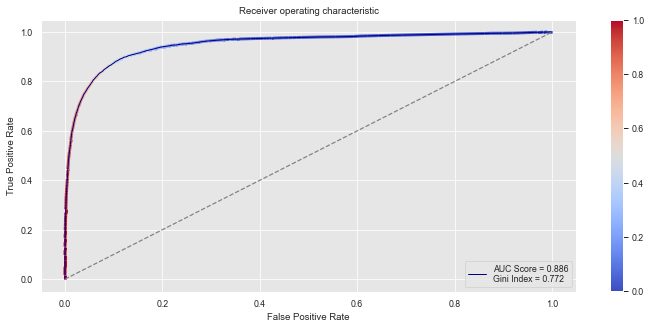

In [46]:
plot_roc(info_thr['recall'], info_thr['fpr'], info_thr['threshold'],0.8859,
         subplots_kwargs=None,
             label_every=None, label_kwargs=None,
             fpr_label='False Positive Rate',
             tpr_label='True Positive Rate',
             luck_label='Luck',
             title='Receiver operating characteristic')

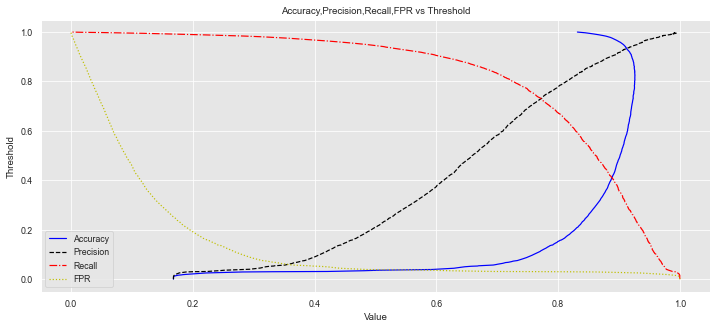

In [47]:
# plot lines
plt.plot(info_thr['accuracy'], info_thr['threshold'],color='b' , label = "Accuracy", linestyle="-")
plt.plot(info_thr['precision'], info_thr['threshold'],color='k', label = "Precision", linestyle="--")
plt.plot(info_thr['recall'], info_thr['threshold'], color='r',label = "Recall", linestyle="-.")
plt.plot(info_thr['fpr'], info_thr['threshold'],color='y' ,label = "FPR", linestyle=":")
plt.legend()
plt.xlabel('Value')
plt.ylabel('Threshold')
plt.title('Accuracy,Precision,Recall,FPR vs Threshold')
plt.show()